In [1]:
from lib import *

Pipeline = pipeline.Pipeline
RegressionValidator = pipeline.RegressionValidator

DatasetProvider = provider.DatasetProvider
DatasetUploader = provider.DatasetUploader

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from tqdm._tqdm_notebook import tqdm_notebook
from tqdm._tqdm_notebook import tqdm
tqdm_notebook.pandas()

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

/tmp/ipykernel_5448/2147512924.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook


In [3]:
import pickle

def load_pickle(dataset, name):
    dataset.to_pickle(name + '.pkl')

def from_pickle(path):
    with open(path, 'rb') as reader:
        return pickle.load(reader)

In [4]:
errors = from_pickle('tmp/ridge_error.pkl')

In [5]:
errors

(3.1020921763666367,
 array([[0.09057742],
        [0.10649438],
        [0.09729282],
        ...,
        [0.09248606],
        [0.09248606],
        [0.09248606]]),
          target
 id             
 54          0.0
 114         0.0
 174         0.0
 234         0.0
 294         0.0
 ...         ...
 1330036     0.0
 1330090     0.0
 1330142     0.0
 1330150     0.0
 1330156     0.0
 
 [422577 rows x 1 columns])

In [6]:
def get_statistics(report):
    stat = report[2]
    stat['residuals'] = report[1] - report[2]
    stat['id'] = report[2].index
    return stat

In [7]:
report = get_statistics(errors)

In [8]:
report

,target,residuals,id
id,,,
54,0.0,0.090577,54
114,0.0,0.106494,114
174,0.0,0.097293,174
234,0.0,0.090577,234
294,0.0,0.103207,294
...,...,...,...
1330036,0.0,0.092486,1330036
1330090,0.0,0.092486,1330090
1330142,0.0,0.092486,1330142


<AxesSubplot:xlabel='residuals'>

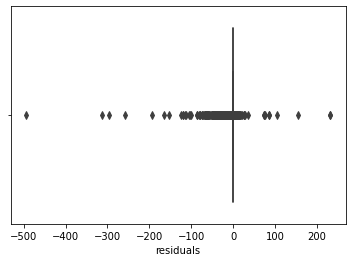

In [9]:
sns.boxplot(data=report, x='residuals')

In [10]:
# sns.lmplot(data=report, x='target', y='residuals')

In [1]:
# sns.histplot(report.residuals.sample(n=1000), kde=True)